In [1]:
#IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Model Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Decision tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
"""
PUNTO 1.1
    Caricare il dataset e denominarlo con una variabile chiamata “dataset”
"""
path = 'bike.csv'
dataset = pd.read_csv(path, sep = ';')

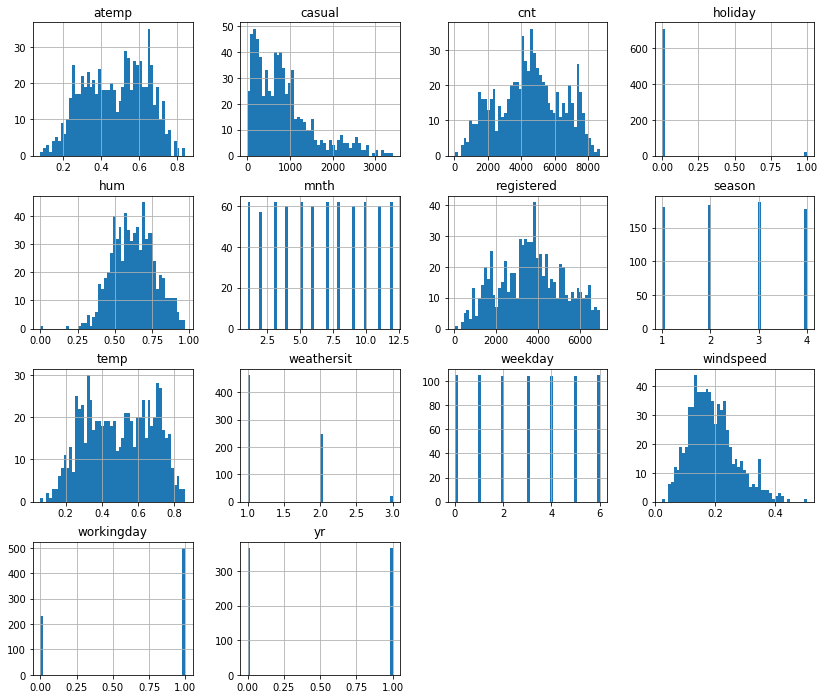

In [3]:
# Per questioni didattiche vedo come è descritto il dataset
dataset.hist(figsize=(14, 12), bins=50)
plt.show()

In [4]:
"""
PUNTO 1.2
    Indicare quante sono le biciclette noleggiate in primavera, estate, autunno, e inverno
"""
dataset_seasons = dataset.groupby(['season'])['season'].count()
print('Biciclette noleggiate in primavera: {}'.format(dataset_seasons[1]))
print('Biciclette noleggiate in estate: {}'.format(dataset_seasons[2]))
print('Biciclette noleggiate in autunno: {}'.format(dataset_seasons[3]))
print('Biciclette noleggiate in inverno: {}'.format(dataset_seasons[4]))

Biciclette noleggiate in primavera: 181
Biciclette noleggiate in estate: 184
Biciclette noleggiate in autunno: 188
Biciclette noleggiate in inverno: 178


In [5]:
"""
PUNTO 1.3
    Raggruppando i noleggi per mesi e per anni e contando i noleggi effettuati è possibile verificare se
    ci sono andamenti particolari, ovvero: c’è un forte scostamento tra i noleggi effettuati un anno rispetto
    al secondo? C’è un forte scostamento tra i mesi?
"""
dataset_years = dataset.groupby(['mnth', 'yr'])['mnth'].count()
print(dataset_years.values)
print('Si può notare come lo scostamento sia praticamente nullo, l\'unica differenza di ha per il mese di febbraio')

[31 31 28 29 31 31 30 30 31 31 30 30 31 31 31 31 30 30 31 31 30 30 31 31]
Si può notare come lo scostamento sia praticamente nullo, l'unica differenza di ha per il mese di febbraio


In [6]:
"""
PUNTO 1.4
    Realizzare un’immagine grafica  che rappresenti in maniera efficace la richiesta del punto 3
"""
print('TO-DO')

TO-DO


In [7]:
"""
PUNTO 2.1
    Si vuole predire il  tempo (weathersit) nella città sulla base degli altri valori del dataset.
    Dividere “dataset” in modo che 2/3 degli elementi casualmente scelti siano contenuti in un nuovo 
    dataset “train” e 1/3 nel dataset “test”.
    Valutare l’accuracy ottenuta con il modello LogisticRegression
    (from sklearn.linear_model import LogisticRegression)
"""
X = dataset.drop('weathersit', axis = 1)
Y = dataset['weathersit']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 3)
print('Shape X_train: {}'.format(X_train.shape))
print('Shape X_test: {}'.format(X_test.shape))
print('Shape y_train: {}'.format(y_train.shape))
print('Shape y_test: {}'.format(y_test.shape))

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Logistic Regression: {:.03}".format(accuracy_lr))

Shape X_train: (489, 13)
Shape X_test: (242, 13)
Shape y_train: (489,)
Shape y_test: (242,)
Accuracy Logistic Regression: 0.682


In [8]:
"""
PUNTO 2.2
    Il valore di accuratezza ottenuto è abbastanza elevato, tuttavia, cosa si scopre analizzando la 
    confusion matrix
"""
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix\n {}'.format(cm_lr))

Confusion Matrix
 [[131   7   1]
 [ 60  34   2]
 [  0   7   0]]


In [9]:
"""
PUNTO 2.3
    Che valore di accuratezza si ottiene con un 5 Fold cross validation?
"""
num_folds = 5
scoring = 'accuracy'
scores = cross_val_score(logistic_regression, X, Y, cv=num_folds, scoring= scoring)
print("Scores Cross Validate: {:0.3f}".format(scores.mean()))

Scores Cross Validate: 0.691


In [10]:
"""
PUNTO 2.4
    E’ un valore più o meno attendibile del precedente? Perché?
"""
print('E\' un valore più alto')

E' un valore più alto


In [11]:
"""
PUNTO 2.5
    Se si utilizza un modello basato su Decision Tree che valore di accuratezza si ottiene 
    utilizzando entrambi i metodi? Cambia qualcosa nella confusion matrix?
"""
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Accuracy con Decision Tree: {:.03}".format(accuracy_dt))
print("Decision tree \n {}".format(cm_dt))

Accuracy con Decision Tree: 0.719
Decision tree 
 [[108  31   0]
 [ 26  65   5]
 [  0   6   1]]


In [12]:
"""
PUNTO 2.6
    Creare un nuovo attributo “tempSimpl” con due valori = 2 se la temperatura percepita (atemp)
    è maggiore della media, 1 se inferiore alla media. Si elimini poi la colonna atemp e si effettui 
    una valutazione 5 cross fold usando un modello basato su Decision Tree. Che accuratezza si ottiene?
"""
# Calcolo media
mean_atemp = X['atemp'].mean()
# Sostituzione
X['tempSimpl'] = np.where(X['atemp'] < mean_atemp, 1, 2)
# Eliminazione riga 
X_new = X.drop('atemp', axis=1)
print('Verifica tramite il numero di istanze')
print('Numeri di righe con \'tempSimpl\' uguale a 1: {}'.format(X_new[X_new['tempSimpl'] == 1].shape))
print('Numeri di righe con \'tempSimpl\' uguale a 2: {}'.format(X_new[X_new['tempSimpl'] == 2].shape))
print('Totale: {}'.format(X_new.shape))

# Calcolo cross fold
test_size = 0.33
seed = 11
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = test_size, random_state = seed)
decision_tree.fit(X_train, Y_train)
y_pred = decision_tree.predict(X_test)

print("############################################")
num_folds = 5
scores = cross_val_score(decision_tree, X, Y, cv=num_folds, scoring= scoring)
print("Scores Cross Validate: {:0.3f}".format(scores.mean()))

Verifica tramite il numero di istanze
Numeri di righe con 'tempSimpl' uguale a 1: (357, 13)
Numeri di righe con 'tempSimpl' uguale a 2: (374, 13)
Totale: (731, 13)
############################################
Scores Cross Validate: 0.665


In [13]:
"""
PUNTO 2.7

    Si modifichi  il “dataset” creando il dataset “simplified”. In questo si introduca un nuovo attributo
    “dayVsNight” con due valori: 1 se il valore di hr è compreso tra 8 e 20; 2 negli altri casi. Si elimini
    poi hr. Si eliminino pure le colonne casual, registered e cnt. Si provi il dataset con il DecisionTree 
    e una valutazione 5Fold. Che accuratezza si ottiene? Per quale motivo?
    
"""
print('NON SI PUO\' FARE')

NON SI PUO' FARE


In [14]:
"""
PUNTO 2.8
    Si crei l’attributo “day” con valore 1 se è giorno (si ha il valore 1 in “dayVsNight”) e 0 negli altri 
    casi. Si crei l’attributo “night” con valore 1 se è notte (si ha  il valore 2 in “dayVsNight”) e 0 
    negli altri casi. Si elimini poi “dayVsNight”. Cambia qualcosa nella accuratezza?
"""
print('NON SI PUO\' FARE')

NON SI PUO' FARE
